In [1]:
#importing libraries 

import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 

In [2]:
#importing dataset and data preprocessing 

df = pd.read_csv (r"C:\Users\sejal\Downloads\Invistico_Airline.csv")
df  = df.dropna()
df

,satisfaction,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,...,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
0,satisfied,Female,Loyal Customer,65,Personal Travel,Eco,265,0,0,0,...,2,3,3,0,3,5,3,2,0,0.0
1,satisfied,Male,Loyal Customer,47,Personal Travel,Business,2464,0,0,0,...,2,3,4,4,4,2,3,2,310,305.0
2,satisfied,Female,Loyal Customer,15,Personal Travel,Eco,2138,0,0,0,...,2,2,3,3,4,4,4,2,0,0.0
3,satisfied,Female,Loyal Customer,60,Personal Travel,Eco,623,0,0,0,...,3,1,1,0,1,4,1,3,0,0.0
4,satisfied,Female,Loyal Customer,70,Personal Travel,Eco,354,0,0,0,...,4,2,2,0,2,4,2,5,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129875,satisfied,Female,disloyal Customer,29,Personal Travel,Eco,1731,5,5,5,...,2,2,3,3,4,4,4,2,0,0.0
129876,dissatisfied,Male,disloyal Customer,63,Personal Travel,Business,2087,2,3,2,...,1,3,2,3,3,1,2,1,174,172.0
129877,dissatisfied,Male,disloyal Customer,69,Personal Travel,Eco,2320,3,0,3,...,2,4,4,3,4,2,3,2,155,163.0
129878,dissatisfied,Male,disloyal Customer,66,Personal Travel,Eco,2450,3,2,3,...,2,3,3,2,3,2,1,2,193,205.0


In [3]:
#defining dependent and independent variable 

X = df.iloc [:, 1:23]
y = df.iloc[:, 0]

In [4]:
#splitting independent variables into categorical and numerical 

X_categorical = df[['Gender', 'Customer Type', 'Type of Travel',
       'Class', 'Seat comfort', 'Departure/Arrival time convenient', 'Food and drink', 'Gate location',
       'Inflight wifi service', 'Inflight entertainment', 'Online support',
       'Ease of Online booking', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Cleanliness', 'Online boarding']]
X_numerical = df[['Age', 'Flight Distance',  'Departure Delay in Minutes', 'Arrival Delay in Minutes']]

X_categorical = X_categorical.astype(str)

categorical_features = X_categorical.columns

In [5]:
#encoding the categorical data 
#splitting the data into train and test set 

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder 

def prepare_inputs(X_train, X_test):
    oe = OrdinalEncoder(handle_unknown='ignore')
    oe.fit(X_train)
    X_train_enc = oe.transform(X_train)
    X_test_enc = oe.transform(X_test)
    return X_train_enc, X_test_enc

def prepare_targets(y_train, y_test):
    le = LabelEncoder()
    le.fit(y_train)
    y_train_enc = le.transform(y_train)
    y_test_enc = le.transform(y_test)
    return y_train_enc, y_test_enc


X_train, X_test, y_train, y_test = train_test_split(X_categorical, y, test_size=0.2, random_state=1)
X_train_enc, X_test_enc = prepare_inputs(X_train, X_test)
y_train_enc, y_test_enc = prepare_targets(y_train, y_test)

In [6]:
#feature selection using chi-squared values 

from sklearn.feature_selection import SelectKBest, chi2

fs = SelectKBest (score_func=chi2, k='all')
fs.fit(X_train_enc, y_train_enc)
X_train_fs = fs.transform(X_train_enc)
X_test_fs = fs.transform(X_test_enc)

Feature 0 Gender: 2322.390151
Feature 1 Customer Type: 7271.534413
Feature 2 Type of Travel: 858.092548
Feature 3 Class: 5302.250937
Feature 4 Seat comfort: 4011.272191
Feature 5 Departure/Arrival time convenient: 24.703634
Feature 6 Food and drink: 1061.429310
Feature 7 Gate location: 14.051860
Feature 8 Inflight wifi service: 2885.790776
Feature 9 Inflight entertainment: 15139.826319
Feature 10 Online support: 7668.976898
Feature 11 Ease of Online booking: 9514.207878
Feature 12 On-board service: 5978.068945
Feature 13 Leg room service: 4702.022577
Feature 14 Baggage handling: 3502.962478
Feature 15 Checkin service: 3509.826171
Feature 16 Cleanliness: 2542.682086
Feature 17 Online boarding: 5986.758161


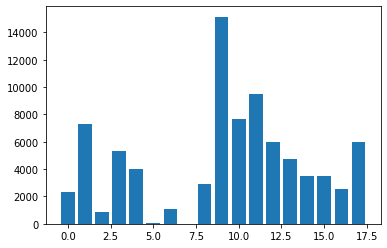

In [7]:
for i in range (len(fs.scores_)):
    print('Feature %d %s: %f' % (i, categorical_features[i], fs.scores_[i]))
    
plt.bar([i for i in range (len(fs.scores_))], fs.scores_)
plt.show() 

In [8]:
scores = pd.DataFrame(categorical_features, fs.scores_)
scores.reset_index(inplace=True)
scores.sort_values(by=['index'], inplace=True, ascending=False)
scores

,index,0
9,15139.826319,Inflight entertainment
11,9514.207878,Ease of Online booking
10,7668.976898,Online support
1,7271.534413,Customer Type
17,5986.758161,Online boarding
12,5978.068945,On-board service
3,5302.250937,Class
13,4702.022577,Leg room service
4,4011.272191,Seat comfort
15,3509.826171,Checkin service


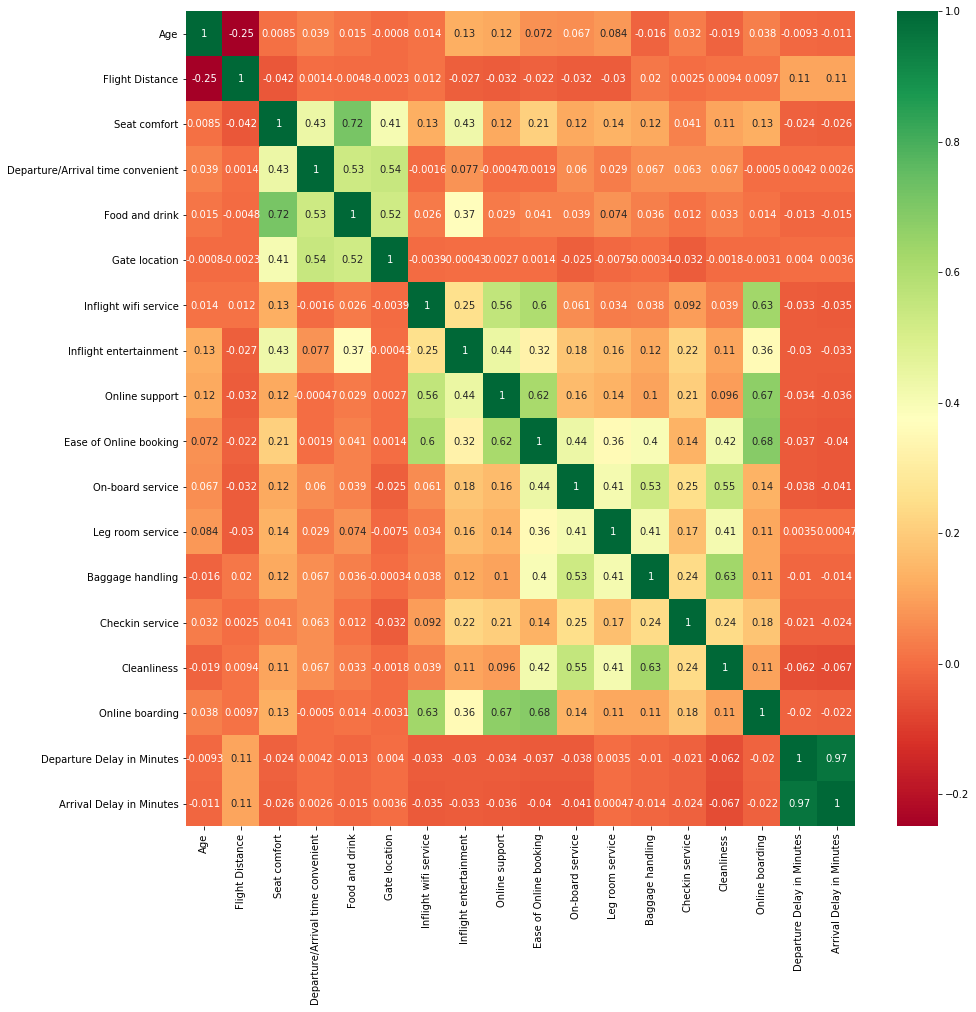

In [9]:
#plotting the correlation heatmap 

corrmat = df.corr()
plt.figure(figsize=(15,15))
g = sns.heatmap(corrmat, annot=True, cmap='RdYlGn')

In [10]:
#feature selection using mutual information analysis 

from sklearn.feature_selection import mutual_info_classif
mic=mutual_info_classif(X_train_enc,y_train_enc)
mic=pd.Series(mic)
mic.index=X_categorical.columns
mic.sort_values(ascending=False)

Inflight entertainment               0.235209
Seat comfort                         0.140429
Ease of Online booking               0.111543
Online support                       0.101493
On-board service                     0.070734
Online boarding                      0.067558
Leg room service                     0.062306
Cleanliness                          0.051962
Class                                0.051921
Baggage handling                     0.051351
Customer Type                        0.045377
Checkin service                      0.044493
Food and drink                       0.038939
Inflight wifi service                0.035105
Gender                               0.025152
Gate location                        0.015337
Type of Travel                       0.003759
Departure/Arrival time convenient    0.001734
dtype: float64

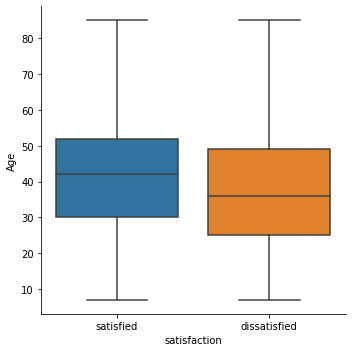

In [11]:
#analyzing age as a feature 

tips = sns.load_dataset("tips")
sns.catplot(x="satisfaction", y='Age', data=df, kind='box')

DROPPED FEATURES: GENDER, GATE LOCATION, TYPE OD TRAVEL, DEPARTURE TIME CONVENIENT, ARRIVAL DELAY IN MINUTES 

### Model Training 

In [12]:
#getting dependent and independent variable 

columns = ['Gender','Gate location','Type of Travel','Departure/Arrival time convenient','Arrival Delay in Minutes','satisfaction']
X=df.drop(columns,axis=1)
y=df['satisfaction']

In [13]:
#encoding categorical data 

from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
X['Class']=le.fit_transform(X['Class'])
X['Customer Type']=le.fit_transform(X['Customer Type'])
X.head()

,Customer Type,Age,Class,Flight Distance,Seat comfort,Food and drink,Inflight wifi service,Inflight entertainment,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes
0,0,65,1,265,0,0,2,4,2,3,3,0,3,5,3,2,0
1,0,47,0,2464,0,0,0,2,2,3,4,4,4,2,3,2,310
2,0,15,1,2138,0,0,2,0,2,2,3,3,4,4,4,2,0
3,0,60,1,623,0,0,3,4,3,1,1,0,1,4,1,3,0
4,0,70,1,354,0,0,4,3,4,2,2,0,2,4,2,5,0


In [14]:
#standardisation 

from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
X_std=ss.fit_transform(X)
X_std

array([[-0.47349456,  1.69149488,  0.65387217, ..., -0.61291868,
        -1.04152574, -0.38603572],
       [-0.47349456,  0.50082485, -0.95547863, ..., -0.61291868,
        -1.04152574,  7.78632838],
       [-0.47349456, -1.61592189,  0.65387217, ...,  0.25537887,
        -1.04152574, -0.38603572],
       ...,
       [ 2.11195667,  1.95608823,  0.65387217, ..., -0.61291868,
        -1.04152574,  3.70014633],
       [ 2.11195667,  1.75764322,  0.65387217, ..., -2.34951377,
        -1.04152574,  4.70191999],
       [ 2.11195667, -0.09451017,  0.65387217, ..., -0.61291868,
        -0.2714769 ,  4.49102028]])

In [15]:
#train-test split 

X_train,X_test,y_train,y_test=train_test_split(X_std,y,test_size=0.2,random_state=0)
print(X_train.shape,X_test.shape)
print(y_train.shape,y_test.shape)

(103589, 17) (25898, 17)
(103589,) (25898,)


Accuracy Score: 0.8212989420032435
Classification Report:               precision    recall  f1-score   support

dissatisfied       0.81      0.80      0.80     11711
   satisfied       0.83      0.84      0.84     14187

    accuracy                           0.82     25898
   macro avg       0.82      0.82      0.82     25898
weighted avg       0.82      0.82      0.82     25898

F1_score:  0.8211808612710311


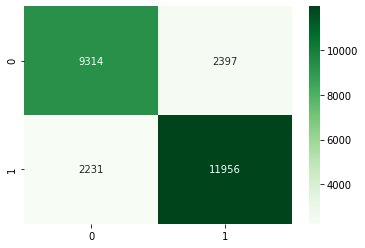

In [16]:
#logistic regression 

from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(X_train,y_train)
yhat=lr.predict(X_test)

from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,f1_score
print("Accuracy Score:", accuracy_score(y_test,yhat))

sns.heatmap(confusion_matrix(y_test,yhat),cmap='Greens',annot=True,fmt='.0f')

print("Classification Report:", classification_report(y_test,yhat))

print("F1_score: ", f1_score(y_test,yhat,average='weighted'))

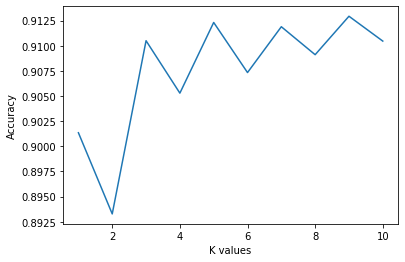

The maximum accuracy 0.9129276391999382 can be oobtained with k value =9
Accuracy score: 0.9129276391999382
Classification report:               precision    recall  f1-score   support

dissatisfied       0.88      0.93      0.91     11711
   satisfied       0.94      0.90      0.92     14187

    accuracy                           0.91     25898
   macro avg       0.91      0.91      0.91     25898
weighted avg       0.91      0.91      0.91     25898

F1_SCORE: 0.913077959364212


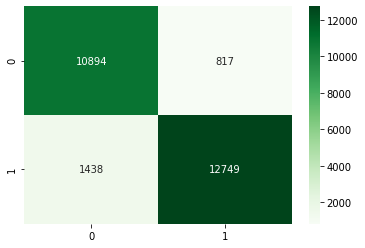

In [17]:
#k-nearest neighbours 

from sklearn.neighbors import KNeighborsClassifier

k_value=[i for i in range(1,11)]
accuracy=[]
for i in k_value:
    knn=KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    accuracy.append(accuracy_score(y_test,knn.predict(X_test)))

plt.plot(k_value,accuracy)
plt.ylabel('Accuracy')
plt.xlabel('K values')
plt.show()   

print('The maximum accuracy {} can be oobtained with k value ={}'.format(max(accuracy),k_value[accuracy.index(max(accuracy))]))

knn=KNeighborsClassifier(n_neighbors=9)
knn.fit(X_train,y_train)

yhat=knn.predict(X_test)

print("Accuracy score:", accuracy_score(y_test,yhat))
sns.heatmap(confusion_matrix(y_test,yhat),annot=True,cmap='Greens',fmt='.0f')
print("Classification report:" , classification_report(y_test,yhat))
print("F1_SCORE:", f1_score(y_test,yhat,average='weighted'))

Accuracy score: 0.932697505598888
Classification report:               precision    recall  f1-score   support

dissatisfied       0.92      0.93      0.93     11711
   satisfied       0.94      0.94      0.94     14187

    accuracy                           0.93     25898
   macro avg       0.93      0.93      0.93     25898
weighted avg       0.93      0.93      0.93     25898

F1_SCORE: 0.9327085804989382


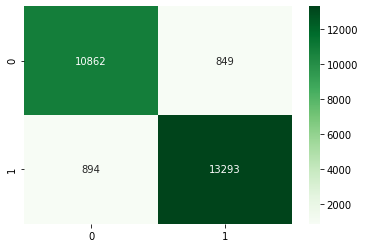

In [18]:
#Support Vector Classification 

from sklearn.svm import SVC
svc=SVC(kernel='rbf')
svc.fit(X_train,y_train)

yhat=svc.predict(X_test)

print("Accuracy score:", accuracy_score(y_test,yhat))
sns.heatmap(confusion_matrix(y_test,yhat),annot=True,cmap='Greens',fmt='.0f')
print("Classification report:" , classification_report(y_test,yhat))
print("F1_SCORE:", f1_score(y_test,yhat,average='weighted'))

In [19]:
#Random Forest Classification 

from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)

from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
print("Accuracy of Random Forst Classification:" , accuracy_score(y_test, y_pred))
print('F1-score of Random Forest Classification:' , f1_score(y_test,y_pred,average='weighted'))

[[11149   562]
 [  988 13199]]
Accuracy of Random Forst Classification: 0.9401498185188045
F1-score of Random Forest Classification: 0.9402282384097816


In [20]:
#XGB Classifier 

from xgboost import XGBClassifier

classifier = XGBClassifier()
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)

from sklearn.metrics import confusion_matrix, accuracy_score
cm=confusion_matrix(y_test, y_pred)
print(cm)
print("Accuracy of XGBoost:", accuracy_score (y_test, y_pred))
print("F1-score of XGBoost:", f1_score(y_test,y_pred,average='weighted'))

[[10511  1200]
 [ 1210 12977]]
Accuracy of XGBoost: 0.9069426210518187
F1-score of XGBoost: 0.9069460738170751
